In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dropout
import os
import cv2
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import keras
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

Using TensorFlow backend.


In [2]:
## load files
train = pd.read_csv(r'C:\Users\sdinu\OneDrive\Documents\02 MS BA\04 Fall 2017\IDS594 Machine Learning with Python\02 Project\01 Dataset\train.csv')
test = pd.read_csv(r'C:\Users\sdinu\OneDrive\Documents\02 MS BA\04 Fall 2017\IDS594 Machine Learning with Python\02 Project\01 Dataset\test.csv')

In [3]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [4]:
print ('The train data has {} images.'.format(train.shape[0]))
print ('The test data has {} images.'.format(test.shape[0]))

The train data has 2250 images.
The test data has 965 images.


In [5]:
# unique label count
print ('The train data has {} unique labels'.format(train['label'].nunique()))

The train data has 25 unique labels


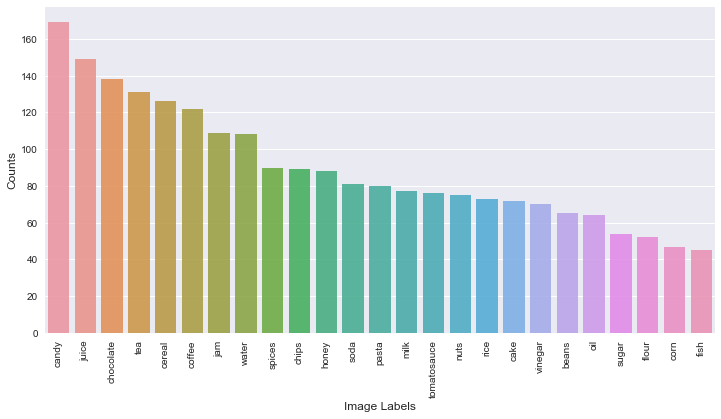

In [6]:
# lets see the distribution

label_counts = train.label.value_counts()
plt.figure(figsize = (12,6))
sns.barplot(label_counts.index, label_counts.values, alpha = 0.9)
plt.xticks(rotation = 'vertical')
plt.xlabel('Image Labels', fontsize =12)
plt.ylabel('Counts', fontsize = 12)
plt.show()

In [8]:
# set path to read train and test image
TRAIN_PATH = 'C:/Users/sdinu/OneDrive/Documents/02 MS BA/04 Fall 2017/IDS594 Machine Learning with Python/02 Project/01 Dataset/train_img/'
TEST_PATH = 'C:/Users/sdinu/OneDrive/Documents/02 MS BA/04 Fall 2017/IDS594 Machine Learning with Python/02 Project/01 Dataset/test_img/'

In [9]:
# function to read images as arrays
def read_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (128,128)) # you can resize to  (128,128) or (256,256)
    return img

In [10]:
# Read images and store it as an array
train_data = []
test_data = []
train_labels = train['label'].values

for img in tqdm(train['image_id'].values):
    train_data.append(read_image(TRAIN_PATH + '{}.png'.format(img)))

train_array = np.asarray(train_data)
    
for img in tqdm(test['image_id'].values):
    test_data.append(read_image(TEST_PATH + '{}.png'.format(img)))

test_array = np.asarray(test_data)
    
train_array = train_array.reshape(train_array.shape[0], 128, 128, 3).astype('float32')
test_array = test_array.reshape(test_array.shape[0], 128, 128, 3).astype('float32')

train_array /= 255
test_array /= 255
print(train_array.shape)
print(test_array.shape)

100%|████████████████████████████████████████████████████████████████████████████████| 965/965 [00:25<00:00, 38.10it/s]


(2250, 128, 128, 3)
(965, 128, 128, 3)


In [ ]:
# target variable - encoding numeric value
label_list = train['label'].tolist()
Y_train = {k:v for v,k in enumerate(set(label_list))}
y_train = [Y_train[k] for k in label_list]

label_list = test['label'].tolist()
Y_test = {k:v for v,k in enumerate(set(label_list))}
y_test = [Y_test[k] for k in label_list]

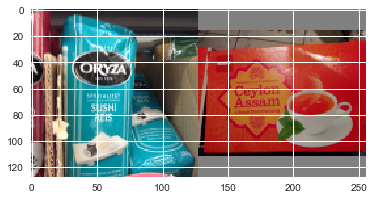

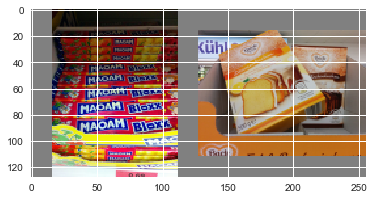

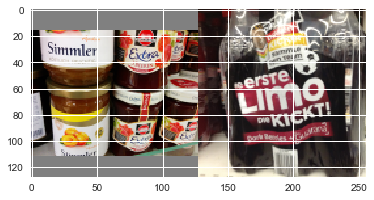

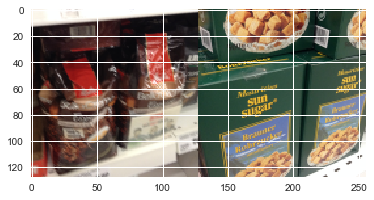

In [11]:
# check some images
def show_images(ix):
    image_train = read_image(TRAIN_PATH + train.image_id[ix] + '.png')
    image_test = read_image(TEST_PATH + test.image_id[ix] + '.png')
    
    pair = np.concatenate((image_train, image_test), axis=1)
    
    plt.figure(figsize = (6,6))
    plt.imshow(pair)
    
# first 4 images in train and test set
for idx in range(4):
    show_images(idx)